This works, but turns out that percentiles doesn't underline extending widths of fluctuations enough. 

In [2]:
%matplotlib inline

In [3]:
import pathlib

import seaborn

import numpy as np
import math
import pandas

from scipy import signal

from scipy.interpolate import interp2d

from matplotlib import pylab

from multiprocessing import Pool

from kaskady2.analyze.profile import *
from kaskady2.analyze.fluctuation_treshold import FluctuationCalculation
from kaskady2.loader.reader import CascadeSetLoader



In [4]:
cascades = CascadeSetLoader.find_cascades(
  pathlib.Path('/home/jb/kaskady-data/g4-production'), 
  material_names= {'G4_PbWO4'}, cuts_kev={1200}
)

In [5]:
fits_dir = pathlib.Path("/tmp/fluc")
fits_dir.mkdir(exist_ok=True)

In [6]:
geometry = cascades[0].main_geometry


In [7]:
calc = FluctuationCalculation.from_geometry(geometry, .9)

In [8]:
calc.percentile_bin()

array([ 114.,  119.,  123.,  125.,  128.,  131.,  134.,  138.,  144.,  155.])

In [9]:
len(cascades)

26

In [10]:
percentiles = np.arange(5, 100, 10)


In [11]:
calc = FluctuationCalculation.from_geometry(cascades[0].main_geometry, 0.8)

In [12]:
result = []
for casc in cascades:
    calc = FluctuationCalculation.from_geometry(casc.main_geometry, 0.8)
    calc.raw_fluctuation
    result.append((
        casc.config,
        calc))

In [13]:
energies = [
    r[0].run_info.energy_mev 
    for r in result
]

In [14]:
result_array = np.vstack(
    (r[1].percentile_bin(percentile=percentiles) for r in result)
)

In [15]:
palette = seaborn.cubehelix_palette(light=1, n_colors=len(percentiles))
for row, color in zip(reversed(result_array.T), palette): 
#     seaborn.pointplot(energies, row, color=color)
    pylab.fill_between(energies, result_array.min(), row, color=color)

#     pylab.xscale('log')


[]

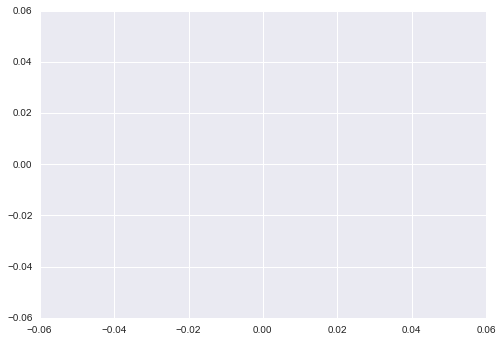

In [16]:
pylab.plot()